<a href="https://colab.research.google.com/github/Akatsuki1910/tokuron/blob/main/mc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
""" plot """

def __nomal_num_over_game(_q_arr):
    """ nomal num over game """
    n_pos = 0
    result_flag = "win"
    while n_pos < 10:
        n_pos += np.random.randint(0, 3)+1
        if n_pos >= 10:
            result_flag = "lose"
            break
        n_pos += np.random.randint(0, 3)+1
    return result_flag


def __num_over_game(q_arr):
    """ num over game """
    # path = []
    n_pos = 0
    result_flag = "win"
    while n_pos < 10:
        n_pos += np.argmax(q_arr[n_pos, ])+1
        # path.append(n_pos)
        if n_pos >= 10:
            result_flag = "lose"
            break
        n_pos += np.random.randint(0, 3)+1
    #     path.append(n_pos)
    # print(path)

    return result_flag


def __play_game(nog, q_arr):
    """ play game """
    win_arr = []
    lose_arr = []
    for _ in range(100):
        win_count = 0
        lose_count = 0
        for _ in range(100):
            if nog(q_arr) == "win":
                win_count += 1
            else:
                lose_count += 1
        win_arr.append(win_count)
        lose_arr.append(lose_count)
    return [win_arr, lose_arr]


def plot_func(q_arr):
    """ plot func """
    nnog = __play_game(__nomal_num_over_game, np.array(np.zeros([10, 3])))
    nog = __play_game(__num_over_game, q_arr)
    points = (nnog[0], nnog[1], nog[0], nog[1])
    _fig, axes = plt.subplots()

    axes.set_xticklabels(
        ["before win", "before lose", "after win", "after lose"])
    axes.boxplot(points)

    plt.title('learning results')
    plt.ylabel('points')

    plt.ylim([0, 100])
    plt.grid()

    plt.show()

    sns.heatmap(q_arr, vmin=-10, vmax=10, annot=True, fmt="1.3f",
                center=0, xticklabels=[i+1 for i in range(3)], yticklabels=[i for i in range(11)])
    plt.title('Q table')
    plt.xlabel("action")
    plt.ylabel("state")
    plt.show()

In [3]:
Q = np.array(np.zeros([11, 3]))

C:\Users\akats\AppData\Local\Temp/ipykernel_7580/591683414.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(


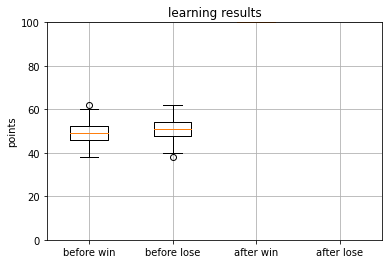

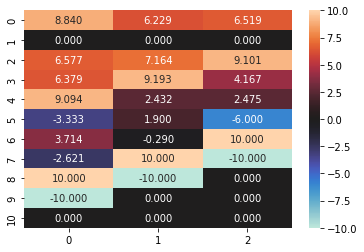

In [4]:
""" monte carlo """

def action_select(s_s, epsilon):
    """ action select """
    arr = [i for i in range(1, 4) if i + s_s < 11]

    if np.random.randint(0, 100) < 10:
        epsilon = 1

    return np.argmax(Q[s_s, :max(arr)])+1 if epsilon == 0 else np.random.choice(arr)


sr = np.array(np.zeros([11, 3]))
rc = np.array(np.zeros([11, 3]))
for i in range(10000):
    S_STATE = 0
    EPI = 0
    memory = []
    while S_STATE != 10:
        a_state = action_select(S_STATE, 0)
        R = 0
        memory.append([S_STATE, a_state])

        s_state_dash = S_STATE + a_state
        if s_state_dash == 10:
            R = -10
        else:
            s_state_dash = action_select(s_state_dash, 1)+s_state_dash
            if s_state_dash == 10:
                R = 10

        EPI += 1

        if R != 0:
            for l in range(EPI):
                st = memory[l][0]
                at = memory[l][1]-1
                rc[st, at] += 1
                sr[st, at] += R
                Q[st, at] = sr[st, at] / rc[st, at]
            EPI = 0
            memory = []

        S_STATE = s_state_dash

plot_func(Q)
